## 시각화

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv("Llama_perp.csv")
cat_dt = pd.read_excel("../combined_data_c.xlsx")

In [4]:
df_tidy = df.assign(category = cat_dt.category.map(lambda x : "Social and Interpersonal Relationships" if x == "Social and Inter-personal Relationships"
                                                    else "Social and Interpersonal Relationships" if pd.isna(x) else x))

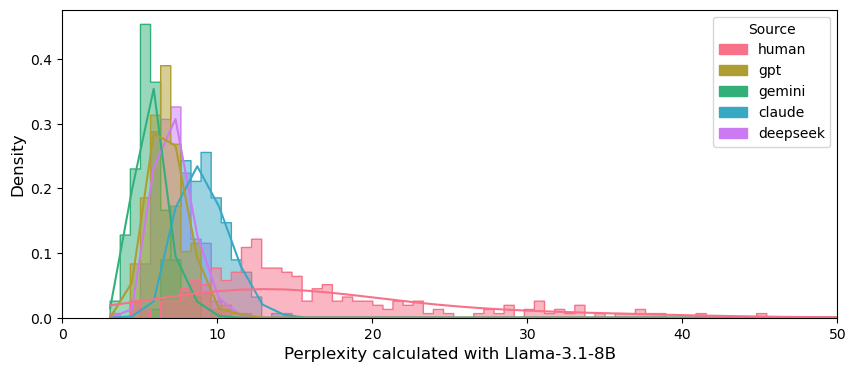

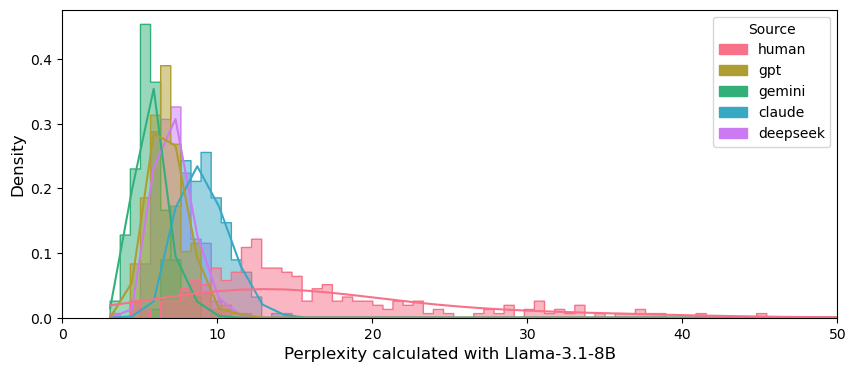

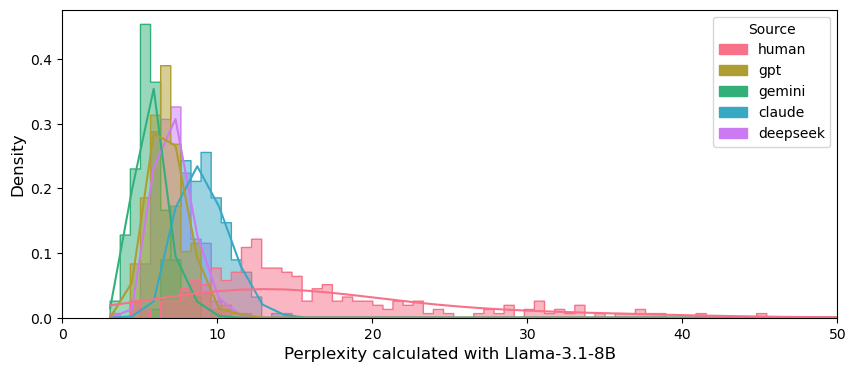

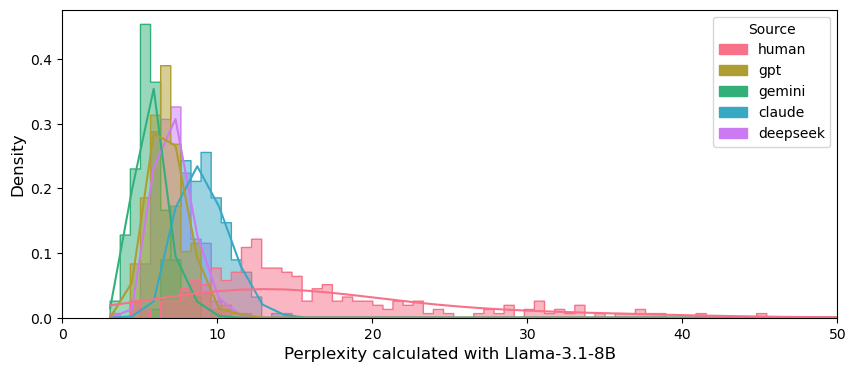

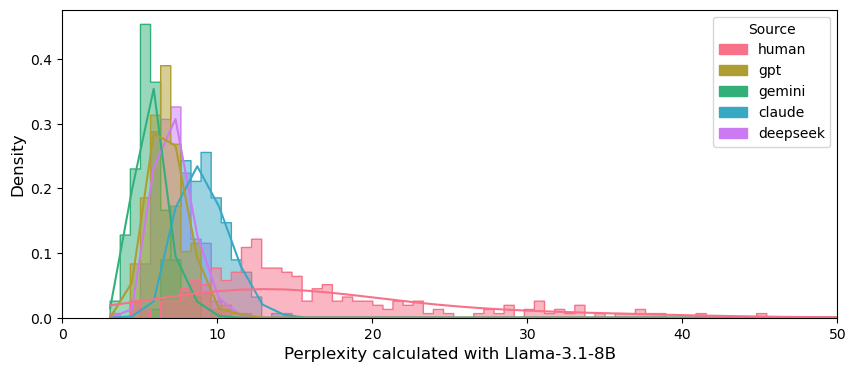

In [10]:
for cat in df_tidy.category.unique():
    # 히스토그램 (단어 수)
    unique_models = ["human", "gpt", "gemini", "claude", "deepseek"] ## 논문에서 정의한 레이블링 순서대로 정렬
    palette = sns.color_palette("husl", len(unique_models))

    plt.figure(figsize=(10, 4))
    sns.histplot(data=df_tidy.loc[df_tidy.category == "Philosophical Concepts"], x='perp', hue='model', kde=True, palette=palette,
                stat="density", common_norm=False, element="step", alpha=0.5, hue_order=unique_models)
    plt.xlabel('Perplexity calculated with Llama-3.1-8B', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlim(0, 50) ## 절사됨

    handles = [mpatches.Patch(color=palette[i], label=unique_models[i]) for i in range(len(unique_models))] ## 범례 패치
    plt.legend(title='Source', handles=handles)
    # plt.show()
    plt.savefig(f"img_50/perp_histogram_labeled_{cat}.png", dpi=300, bbox_inches = "tight")

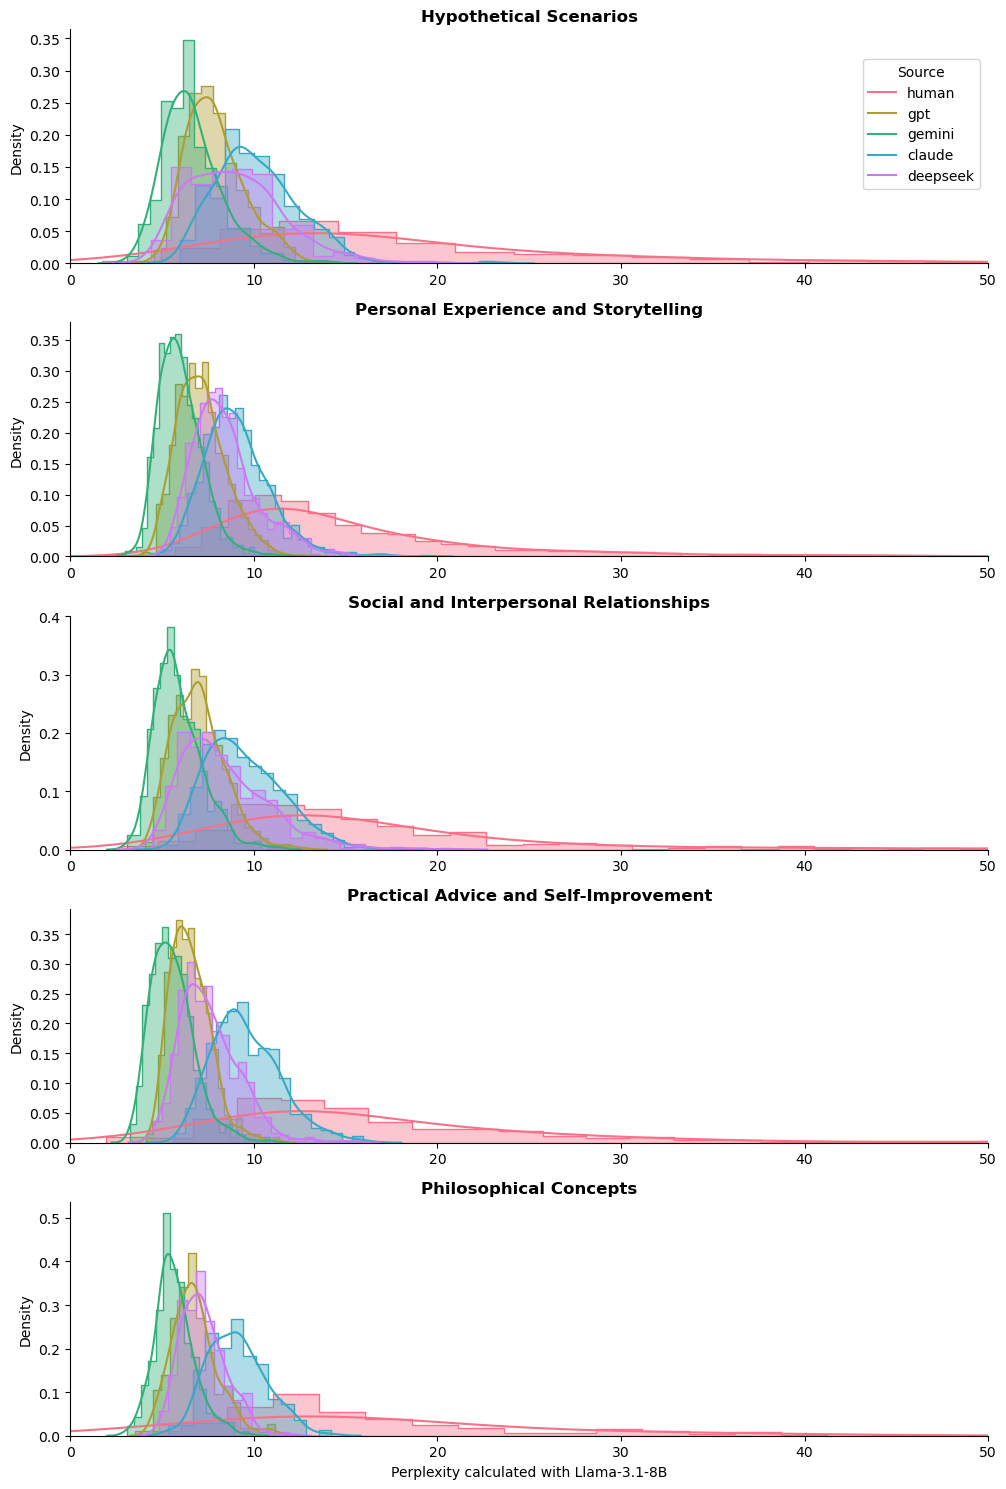

In [11]:
unique_models = ["human", "gpt", "gemini", "claude", "deepseek"]
palette = sns.color_palette("husl", len(unique_models))

row_odr = ["Hypothetical Scenarios", "Personal Experience and Storytelling",
           "Social and Interpersonal Relationships", "Practical Advice and Self-Improvement", "Philosophical Concepts"]

g = sns.FacetGrid(
    df_tidy,
    row="category",
    row_order=row_odr,
    hue="model",
    hue_order=unique_models,
    height=3,
    aspect=3,
    palette=palette,
    sharex=True,
    sharey=False
)

# Histogram
g.map_dataframe(
    sns.histplot,
    x="perp",
    stat="density",
    common_norm=False,
    element="step",
    alpha=0.4
)

# KDE
g.map_dataframe(
    sns.kdeplot,
    x="perp",
    fill=False
)

# 행 제목
g.set_titles(row_template="{row_name}", size=12, weight="bold")

# x축 범위
g.set(xlim=(0, 50))

# ✔ 모든 subplot의 x-ticks는 보이게 유지
for ax in g.axes.flatten():
    ax.xaxis.set_tick_params(labelbottom=True)

# ✔ x축 라벨은 전체 그림 아래에 하나만
g.set_xlabels("Perplexity calculated with Llama-3.1-8B")

# y축 라벨은 그대로
g.set_ylabels("Density")

# 범례
g.add_legend(title="Source")

# 생성된 범례 객체 가져오기
legend = g._legend

legend.set_bbox_to_anchor((0.97, 0.91))   # (x, y) 좌표 (그래프 전체 좌표계 기준)
legend.set_frame_on(True)

plt.tight_layout()
plt.savefig("perp_histogram_labeled_by_cat", dpi=300, bbox_inches = "tight")

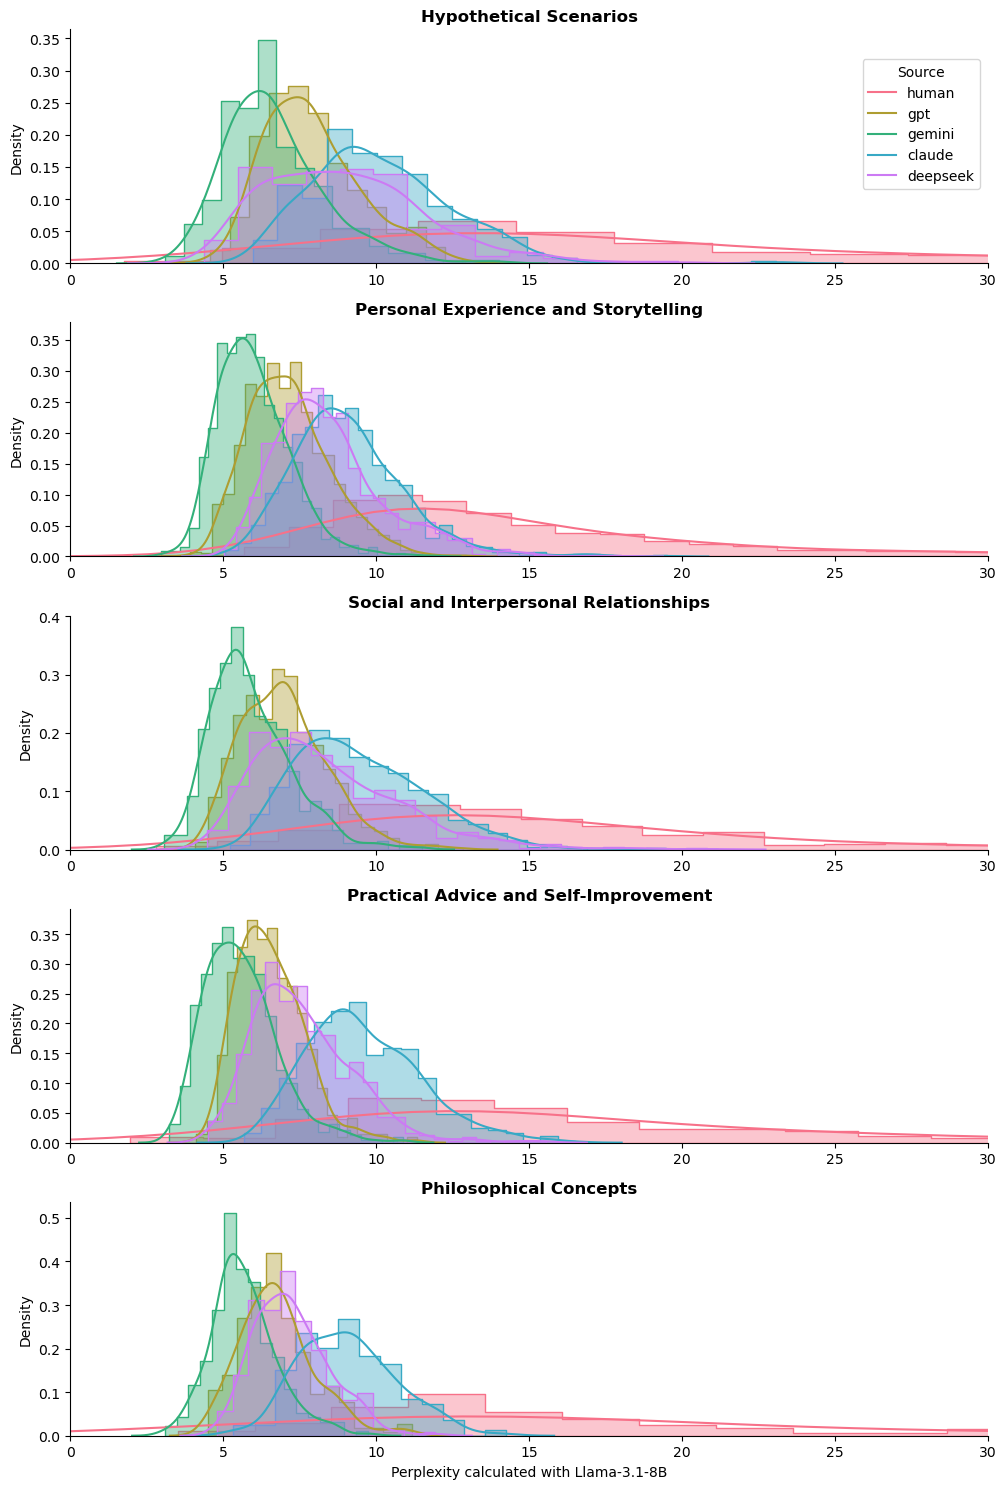

In [12]:
unique_models = ["human", "gpt", "gemini", "claude", "deepseek"]
palette = sns.color_palette("husl", len(unique_models))

row_odr = ["Hypothetical Scenarios", "Personal Experience and Storytelling",
           "Social and Interpersonal Relationships", "Practical Advice and Self-Improvement", "Philosophical Concepts"]

g = sns.FacetGrid(
    df_tidy,
    row="category",
    row_order=row_odr,
    hue="model",
    hue_order=unique_models,
    height=3,
    aspect=3,
    palette=palette,
    sharex=True,
    sharey=False
)

# Histogram
g.map_dataframe(
    sns.histplot,
    x="perp",
    stat="density",
    common_norm=False,
    element="step",
    alpha=0.4
)

# KDE
g.map_dataframe(
    sns.kdeplot,
    x="perp",
    fill=False
)

# 행 제목
g.set_titles(row_template="{row_name}", size=12, weight="bold")

# x축 범위
g.set(xlim=(0, 30))

# ✔ 모든 subplot의 x-ticks는 보이게 유지
for ax in g.axes.flatten():
    ax.xaxis.set_tick_params(labelbottom=True)

# ✔ x축 라벨은 전체 그림 아래에 하나만
g.set_xlabels("Perplexity calculated with Llama-3.1-8B")

# y축 라벨은 그대로
g.set_ylabels("Density")

# 범례
g.add_legend(title="Source")

# 생성된 범례 객체 가져오기
legend = g._legend

legend.set_bbox_to_anchor((0.97, 0.91))   # (x, y) 좌표 (그래프 전체 좌표계 기준)
legend.set_frame_on(True)

plt.tight_layout()
plt.savefig("perp_histogram_labeled_by_cat_30max", dpi=300, bbox_inches = "tight")

In [13]:
df_tidy.pivot_table(index = "category", columns = "model", values = "perp", aggfunc = "median").to_csv("median_table.csv")

### 스트라이딩이 필요한 경우 : 텍스트 컨텍스트 길이가 긴 경우

In [ ]:
max_length = model.config.max_position_embeddings ## max size를 상회함
stride = 512 ## max size : 2799
device = "cuda"

for i, row in texts.iterrows():
    if i == 0 :
        encoding = tokenizer(row["answer"], return_tensors = "pt").to("cuda")
        seq_len = encoding.input_ids.size(1)
        
        nll_sum = 0.0
        n_tokens = 0
        prev_end_loc = 0

        for begin_loc in tqdm(range(0, seq_len, stride)):
            end_loc = min(begin_loc + max_length, seq_len)
            trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
            input_ids = encoding.input_ids[:, begin_loc:end_loc].to(device)
            target_ids = input_ids.clone()
            target_ids[:, :-trg_len] = -100

            with torch.no_grad():
                outputs = model(input_ids, labels=target_ids)

                # loss is calculated using CrossEntropyLoss which averages over valid labels
                # N.B. the model only calculates loss over trg_len - 1 labels, because it internally shifts the labels
                # to the left by 1.
                neg_log_likelihood = outputs.loss

            # Accumulate the total negative log-likelihood and the total number of tokens
            num_valid_tokens = (target_ids != -100).sum().item()  # number of valid tokens in target_ids
            batch_size = target_ids.size(0)
            num_loss_tokens = num_valid_tokens - batch_size  # subtract batch_size due to internal label shift
            nll_sum += neg_log_likelihood * num_loss_tokens
            n_tokens += num_loss_tokens

            prev_end_loc = end_loc
            if end_loc == seq_len:
                break

        avg_nll = nll_sum / n_tokens  # average negative log-likelihood per token
        ppl = torch.exp(avg_nll)


  0%|          | 0/1 [00:00<?, ?it/s]
